In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

# Loading the dataset
data = pd.read_csv('Social_Network_Ads.csv')

# Replace 'Male' with 1 and 'Female' with 0 in the 'Gender' column for logistic regression
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})

# Separating features and target variable
X = data.iloc[:, :4].values  # Considering 'Age' and 'EstimatedSalary' as features
y = data.iloc[:, 4].values

# Splitting the data into training and testing sets (70:30 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [2]:
# Implement Logistic Regression from scratch
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent
        for i in range(self.n_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            # Update weights and bias using gradient descent
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return y_predicted_cls


# Function to evaluate model performance
def evaluate_model(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

# Initialize logistic regression model (Scratch)
log_reg_scratch = LogisticRegressionScratch()

# Training and testing using raw data (Scratch)
log_reg_scratch.fit(X_train, y_train)
y_pred_raw_scratch = log_reg_scratch.predict(X_test)
accuracy_raw_scratch = evaluate_model(y_test, y_pred_raw_scratch)
print("Accuracy using raw data (Scratch):", accuracy_raw_scratch)

# Normalization (Scratch)
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

log_reg_scratch.fit(X_train_normalized, y_train)
y_pred_normalized_scratch = log_reg_scratch.predict(X_test_normalized)
accuracy_normalized_scratch = evaluate_model(y_test, y_pred_normalized_scratch)
print("Accuracy using normalized data (Scratch):", accuracy_normalized_scratch)

# Standardization (Scratch)
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

log_reg_scratch.fit(X_train_standardized, y_train)
y_pred_standardized_scratch = log_reg_scratch.predict(X_test_standardized)
accuracy_standardized_scratch = evaluate_model(y_test, y_pred_standardized_scratch)
print("Accuracy using standardized data (Scratch):", accuracy_standardized_scratch)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20056\367185553.py:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Accuracy using raw data (Scratch): 0.6
Accuracy using normalized data (Scratch): 0.6
Accuracy using standardized data (Scratch): 0.8166666666666667


In [3]:
# Initialize logistic regression model (scikit-learn)
log_reg_sklearn = LogisticRegression()

# Training and testing using raw data (scikit-learn)
log_reg_sklearn.fit(X_train, y_train)
y_pred_raw_sklearn = log_reg_sklearn.predict(X_test)
accuracy_raw_sklearn = evaluate_model(y_test, y_pred_raw_sklearn)
print("\nAccuracy using raw data (scikit-learn):", accuracy_raw_sklearn)

# Normalization (scikit-learn)
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

log_reg_sklearn.fit(X_train_normalized, y_train)
y_pred_normalized_sklearn = log_reg_sklearn.predict(X_test_normalized)
accuracy_normalized_sklearn = evaluate_model(y_test, y_pred_normalized_sklearn)
print("Accuracy using normalized data (scikit-learn):", accuracy_normalized_sklearn)

# Standardization (scikit-learn)
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

log_reg_sklearn.fit(X_train_standardized, y_train)
y_pred_standardized_sklearn = log_reg_sklearn.predict(X_test_standardized)
accuracy_standardized_sklearn = evaluate_model(y_test, y_pred_standardized_sklearn)
print("Accuracy using standardized data (scikit-learn):", accuracy_standardized_sklearn)


Accuracy using raw data (scikit-learn): 0.6916666666666667
Accuracy using normalized data (scikit-learn): 0.7916666666666666
Accuracy using standardized data (scikit-learn): 0.8083333333333333


In [4]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Define Euclidean distance function
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Define k-NN algorithm from scratch
class KNNFromScratch:
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common

# Using k-NN from scratch
knn_scratch = KNNFromScratch(k=3)
knn_scratch.fit(X_train, y_train)
y_pred_scratch = knn_scratch.predict(X_test)

accuracy_scratch = np.mean(y_pred_scratch == y_test)
print(f"Accuracy of k-NN from scratch: {accuracy_scratch}")

Accuracy of k-NN from scratch: 0.9777777777777777


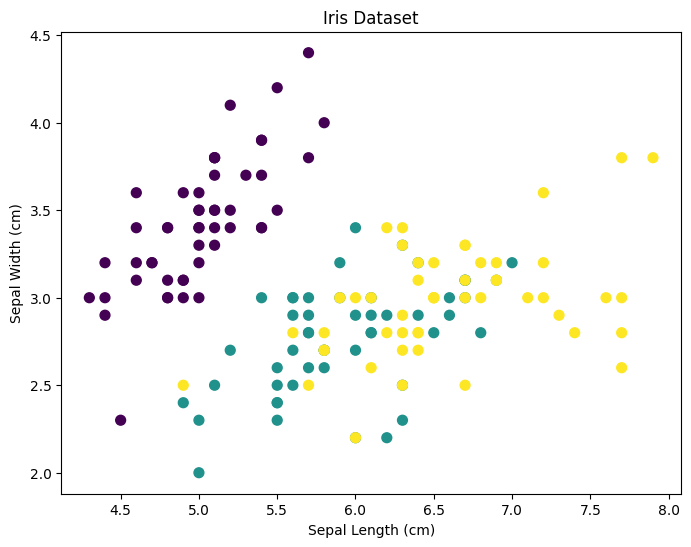

For k = 1, Accuracy: 0.9777777777777777
For k = 2, Accuracy: 0.9777777777777777
For k = 3, Accuracy: 0.9777777777777777
For k = 4, Accuracy: 0.9777777777777777
For k = 5, Accuracy: 0.9777777777777777
For k = 6, Accuracy: 0.9777777777777777
For k = 7, Accuracy: 0.9777777777777777
For k = 8, Accuracy: 0.9777777777777777
For k = 9, Accuracy: 0.9777777777777777
For k = 10, Accuracy: 0.9777777777777777
For k = 11, Accuracy: 0.9777777777777777
For k = 12, Accuracy: 0.9777777777777777
For k = 13, Accuracy: 0.9777777777777777
For k = 14, Accuracy: 0.9777777777777777
For k = 15, Accuracy: 0.9777777777777777
For k = 16, Accuracy: 0.9777777777777777
For k = 17, Accuracy: 0.9777777777777777
For k = 18, Accuracy: 0.9777777777777777
For k = 19, Accuracy: 0.9777777777777777
For k = 20, Accuracy: 0.9777777777777777


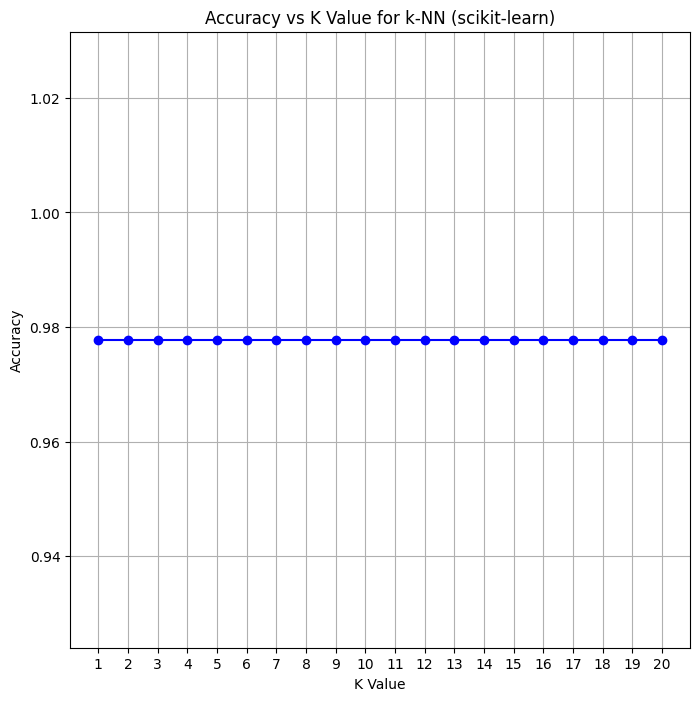

In [5]:


# Plotting the Iris dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50)
plt.title('Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

# Initialize the k-NN classifier
k_values = list(range(1, 21))  # Define a range of k values
accuracies = []#initializing accuracies

for k in k_values:
    # Train the k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Calculate accuracy on the test set
    accuracy = knn.score(X_test, y_test)
    accuracies.append(accuracy)

    print(f"For k = {k}, Accuracy: {accuracy}")
    
# Plotting accuracy vs k value
plt.figure(figsize=(8,8))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs K Value for k-NN (scikit-learn)')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()
